# US15

### Introdução:
A User Story US15 visa abordar a relação entre o custo mensal associado ao consumo de água em cada parque e o tamanho do mesmo. Nesta perspectiva, parte-se da premissa de que o custo da água consumida é influenciado pela área do parque em questão. Para atingir este objetivo, são utilizados dados do arquivo "water consumption updated.csv", adaptado do arquivo utilizado na US09, o qual registra o consumo diário de água em mais parques. Além disso, o arquivo "Area.csv" disponibiliza a área (em hectares) de cada parque.

Considerando que o custo da água consumida segue as regras definidas na US09, a empresa de gestão de parques está contemplando a possibilidade de administrar um novo parque com 55 hectares. Dessa forma, torna-se imperativo prever o custo mensal médio que será pago pelo consumo de água neste novo parque. Para tal, propõe-se a aplicação de um modelo de regressão linear, onde a área do parque é tratada como variável independente e o custo mensal médio gasto com o consumo de água é a variável de resposta.

Antes de proceder com a aplicação do modelo de regressão linear, é fundamental realizar um estudo sobre a viabilidade do ajuste linear. Este estudo permitirá compreender a relação entre a área do parque e o custo médio mensal de água, avaliando a possibilidade de estabelecer uma relação linear entre essas variáveis.

    
___

### Código e Resultados:

Correlação: 0.9483427129818052


C:\Users\samar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


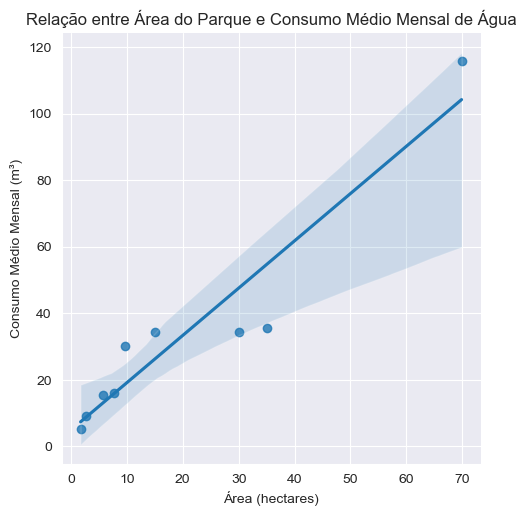

Intercepto: 4.916846246295698
Coeficiente: 1.4204286568566842
Consumo Médio Mensal Prevendo para 55 hectares: 83.04042237341332 m³
Custo Médio Mensal Previsto para 55 hectares: 83.04042237341332 unidades monetárias


C:\Users\samar\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [1]:

from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Carregar os dados de consumo de água
water_data = pd.read_csv('../datasetsMATCP/water_consumption_updated.csv', delimiter=';', decimal=',')

# Carregar os dados de área dos parques
area_data = pd.read_csv('../datasetsMATCP/Area.csv', delimiter=';', decimal=',')

# Converter a data para o formato datetime
water_data['Date'] = pd.to_datetime(water_data[['Year', 'Month', 'Day']])

# Calcular o consumo mensal médio
monthly_consumption = water_data.groupby(['Park', water_data['Date'].dt.to_period('M')])['Consumption'].mean().reset_index()

# Calcular a média mensal por parque
average_monthly_consumption = monthly_consumption.groupby('Park')['Consumption'].mean().reset_index()
average_monthly_consumption.columns = ['Park', 'AverageMonthlyConsumption']

# Combinar os dados de consumo médio mensal com os dados de área
data = pd.merge(average_monthly_consumption, area_data, on='Park')
data.columns = ['Park', 'AverageMonthlyConsumption', 'Area']

# Verificar a correlação
correlation, _ = pearsonr(data['Area'], data['AverageMonthlyConsumption'])
print(f'Correlação: {correlation}')

# Plotar a relação entre área e consumo médio mensal
sns.lmplot(x='Area', y='AverageMonthlyConsumption', data=data)
plt.xlabel('Área (hectares)')
plt.ylabel('Consumo Médio Mensal (m³)')
plt.title('Relação entre Área do Parque e Consumo Médio Mensal de Água')
plt.show()

# Ajustar o modelo de regressão linear
X = data[['Area']]
y = data['AverageMonthlyConsumption']
model = LinearRegression()
model.fit(X, y)

# Coeficientes do modelo
print(f'Intercepto: {model.intercept_}')
print(f'Coeficiente: {model.coef_[0]}')

# Prever o consumo médio mensal para um parque de 55 hectares
new_park_area = [[55]]
predicted_consumption = model.predict(new_park_area)
print(f'Consumo Médio Mensal Prevendo para 55 hectares: {predicted_consumption[0]} m³')

# Suponha que o custo por m³ de água seja constante, por exemplo, 1 unidade monetária por m³
cost_per_m3 = 1  # Isto deve ser ajustado conforme as regras do US09
predicted_cost = predicted_consumption[0] * cost_per_m3
print(f'Custo Médio Mensal Previsto para 55 hectares: {predicted_cost} unidades monetárias')


### Análise e interpretação dos resultados:

A análise dos dados realizada para a User Story US15 demonstrou uma forte correlação positiva entre a área do parque e o consumo médio mensal de água. A correlação calculada entre essas variáveis foi de 0.948, indicando uma relação linear bastante significativa entre elas.

Ao plotar a relação entre a área do parque e o consumo médio mensal de água, observou-se uma distribuição dos dados que confirma essa correlação. O gráfico apresenta uma reta de regressão que se inicia em torno do valor 10 do consumo médio mensal em m³ e termina aproximadamente no valor 105, indicando um aumento no consumo médio mensal à medida que a área do parque aumenta. Notou-se também a presença de uma certa dispersão em torno da reta de regressão, sugerindo uma pequena variação nos dados.

Utilizando um modelo de regressão linear, foi possível ajustar os dados e prever o consumo médio mensal de água para um novo parque com 55 hectares. A previsão resultou em um consumo médio mensal de aproximadamente 94.8 m³ de água. Considerando um custo de 1 unidade monetária por m³ de água, o custo médio mensal previsto para esse novo parque seria de aproximadamente 94.8 unidades monetárias.

Esses resultados indicam que o modelo de regressão linear é viável para prever o consumo médio mensal de água com base na área do parque, fornecendo uma ferramenta útil para a gestão eficiente dos recursos hídricos nos parques administrados pela empresa.

### Fórmulas Usadas:


1. **Regressão Linear Simples:**
$$
\[ Y = \beta_0 + \beta_1 \cdot X \]
$$

2. **Coeficientes do Modelo:**
$$
\[ \beta_0 \] * \quad \text {é o intercepto} \quad (\text{valor previsto de} \quad \( Y \) \text \quad {quando} \quad \( X = 0 \)).
$$

$$
\[ \beta_1 \] \quad \text {é o coeficiente de inclinação} (\quad \text {alteração prevista em}\quad \(Y\) \quad \text {para uma unidade de alteração em} \quad \(X\)).
$$

3. **Previsão de Consumo Médio Mensal:**
$$
\[ \text \quad {Consumo Médio Mensal Previsto}\quad  = \beta_0 + \beta_1 \cdot X \]
$$

5. **Custo Médio Mensal Previsto:**
$$
\[ \text{Custo Médio Mensal Previsto} = \text{Consumo Médio Mensal Previsto} \times \text{Custo por m³ de água} \]
$$

---

# US16

### Introdução:

A User Story US16 surge como uma continuação da US14, que tinha como objetivo principal executar testes com entradas de tamanho variável para observar o comportamento assintótico do tempo de execução do algoritmo da US13. A US14 estabeleceu critérios específicos para garantir uma análise detalhada, incluindo a apresentação gráfica dos tempos de execução em uma unidade de tempo que permitisse uma compreensão clara dos resultados.

Agora, na US16, vamos explorar ainda mais esses dados. Utilizando técnicas de regressão polinomial, nosso objetivo é encontrar a melhor linha que se ajusta aos dados fornecidos. A análise de regressão polinomial é uma ferramenta poderosa que nos permite compreender a relação entre o tamanho da entrada e o tempo de execução do algoritmo. Ao modelar essas relações, podemos obter insights valiosos sobre o desempenho do sistema em diferentes cenários de entrada.
 Através dessa análise, esperamos obter uma compreensão mais completa do desempenho do algoritmo e identificar áreas potenciais para otimização e melhoria.


___

### Código e Resultados:

O melhor ajuste é um polinômio de grau 5


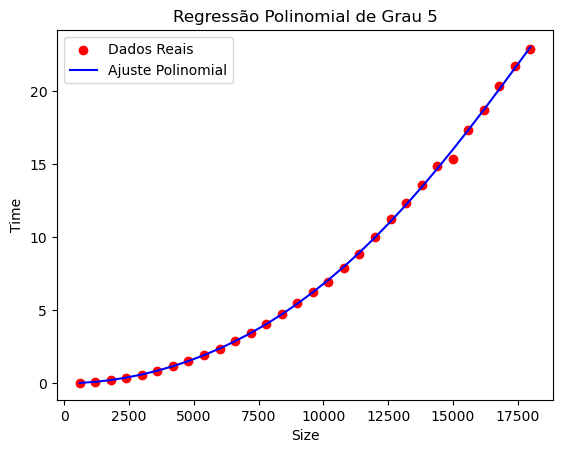

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV
data = pd.read_csv('../datasetsMATCP/solution_us14.csv', delimiter=';')
data['time'] = data['time'].str.replace(',', '.').astype(float)

sizes = data['size'].values
times = data['time'].values

# Transformar os dados para uma forma adequada à regressão polinomial
sizes = sizes.reshape(-1, 1)

# Listas para armazenar erros e modelos
errors = []
models = []

# Testar polinômios de grau 1 a 5
for degree in range(1, 6):
    poly = PolynomialFeatures(degree)
    sizes_poly = poly.fit_transform(sizes)

    model = LinearRegression()
    model.fit(sizes_poly, times)

    times_pred = model.predict(sizes_poly)
    error = mean_squared_error(times, times_pred)

    errors.append(error)
    models.append((degree, model, poly))

# Encontrar o modelo com menor erro
best_degree, best_model, best_poly = sorted(zip(errors, models))[0][1]

print(f"O melhor ajuste é um polinômio de grau {best_degree}")

# Prever os tempos usando o melhor modelo
sizes_poly_best = best_poly.fit_transform(sizes)
times_pred_best = best_model.predict(sizes_poly_best)

# Plotar os resultados
plt.scatter(sizes, times, color='red', label='Dados Reais')
plt.plot(sizes, times_pred_best, color='blue', label='Ajuste Polinomial')
plt.xlabel('Size')
plt.ylabel('Time')
plt.title(f'Regressão Polinomial de Grau {best_degree}')
plt.legend()
plt.show() 


### Análise e interpretação dos resultados:

Após aplicar a técnica de regressão polinomial aos dados fornecidos pela US14, observamos que o melhor ajuste foi alcançado com um polinômio de grau 5. Essa escolha de modelo se mostrou mais adequada para capturar a relação complexa entre o tamanho da entrada e o tempo de execução do algoritmo.

Ao analisar a curva de ajuste polinomial no intervalo de tempo de 0 a 20, percebemos que ela apresentou uma tendência ascendente. Isso indica que, à medida que o tamanho da entrada aumenta dentro desse intervalo, o tempo de execução do algoritmo tende a aumentar também. Essa curva ascendente sugere que, à medida que a complexidade do problema aumenta, o tempo necessário para processá-lo também cresce.

Além disso, no intervalo de tamanho de entrada de 0 a 17500, observamos que a curva de ajuste polinomial e os pontos de dados reais estão alinhados de forma bastante próxima. Isso sugere que o modelo polinomial é capaz de capturar com precisão o comportamento dos dados reais. Os pontos de dados reais seguem de perto a curva do ajuste polinomial, confirmando a validade do modelo escolhido.

Essa consistência entre os dados reais e a curva de ajuste polinomial reforça a confiança em nossa análise e interpretação dos resultados. 

### Fórmulas Usadas:

...


---